In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Data/Real-Data/Real_Combine.csv")
data = data.dropna(axis=0)

In [3]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

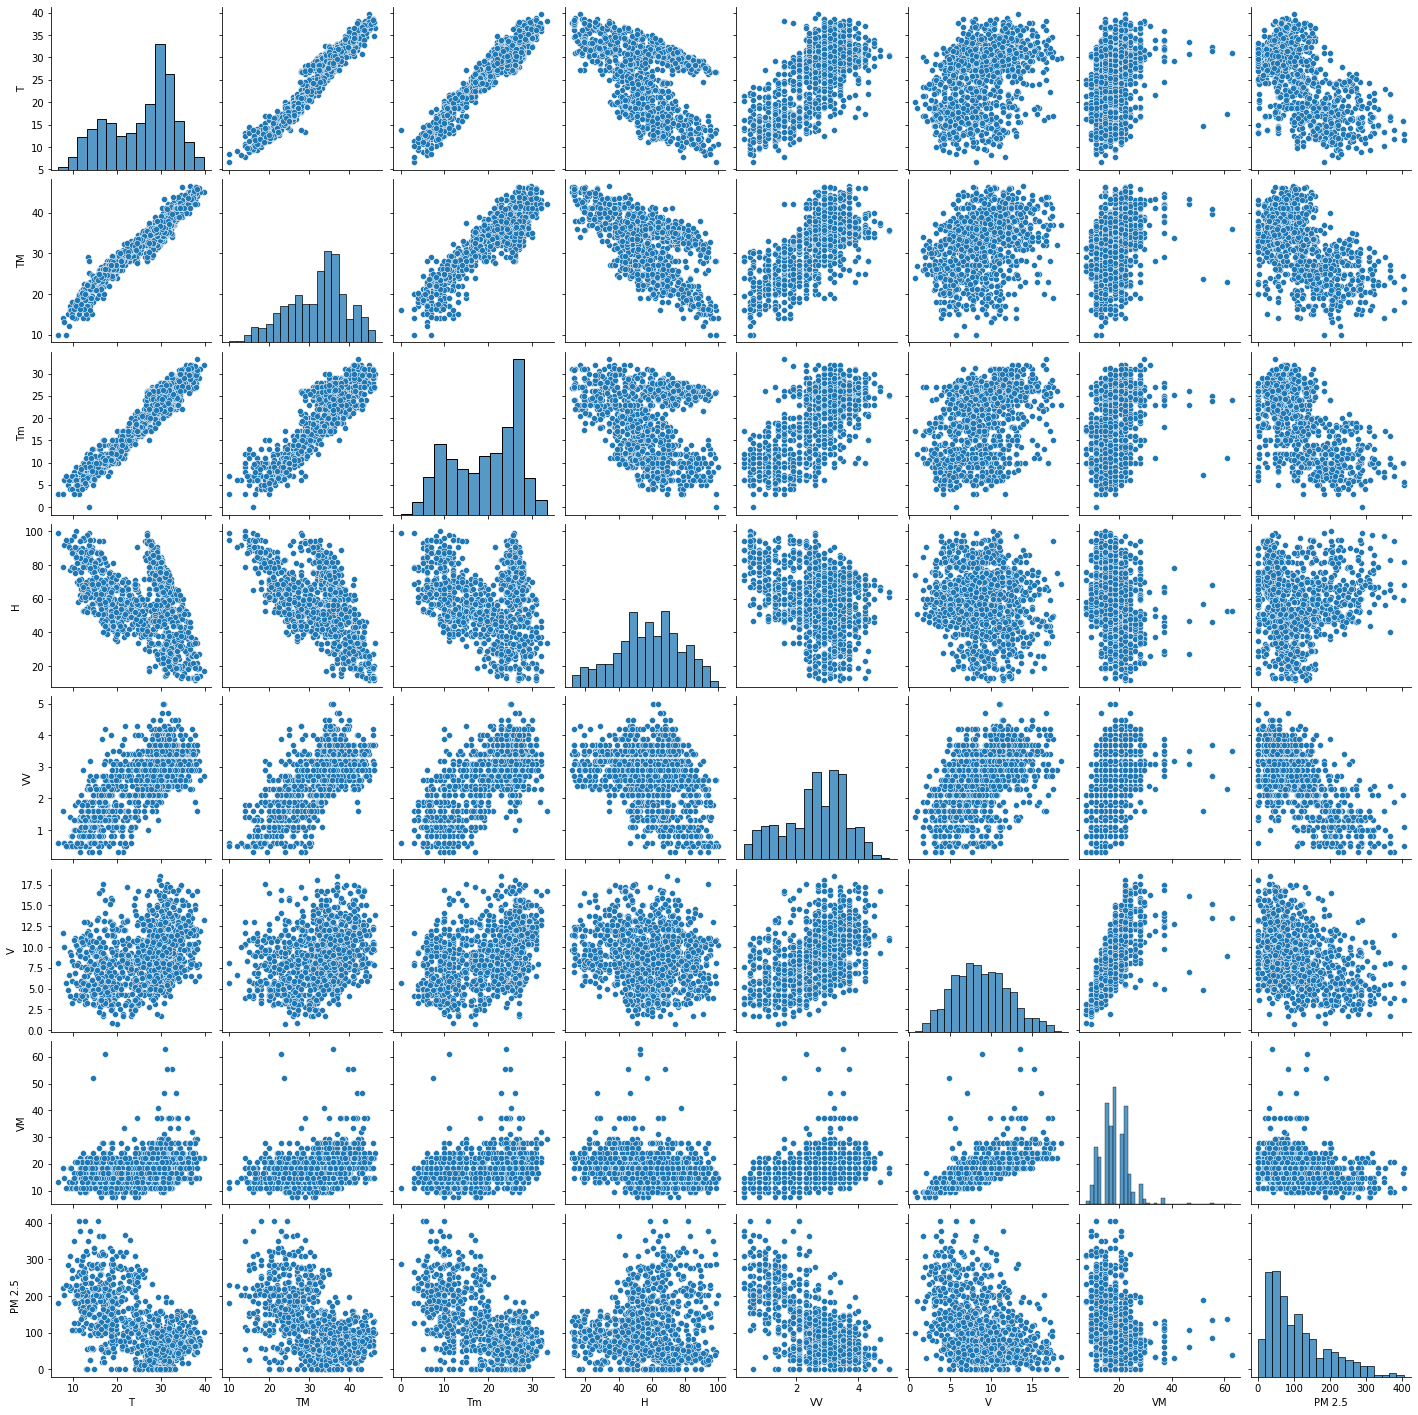

In [4]:
sns.pairplot(data)

In [5]:
data.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.965134,0.959573,-0.454416,0.716203,0.361213,0.303626,-0.609707
TM,0.965134,1.000000,0.876230,-0.590142,0.694926,0.318071,0.315274,-0.536629
Tm,0.959573,0.876230,1.000000,-0.236208,0.673406,0.386321,0.280700,-0.641218
H,-0.454416,-0.590142,-0.236208,1.000000,-0.384149,-0.138716,-0.224040,0.072419
VV,0.716203,0.694926,0.673406,-0.384149,1.000000,0.475251,0.378331,-0.675245
V,0.361213,0.318071,0.386321,-0.138716,0.475251,1.000000,0.661406,-0.402379
VM,0.303626,0.315274,0.280700,-0.224040,0.378331,0.661406,1.000000,-0.301507
PM 2.5,-0.609707,-0.536629,-0.641218,0.072419,-0.675245,-0.402379,-0.301507,1.000000


<AxesSubplot:>

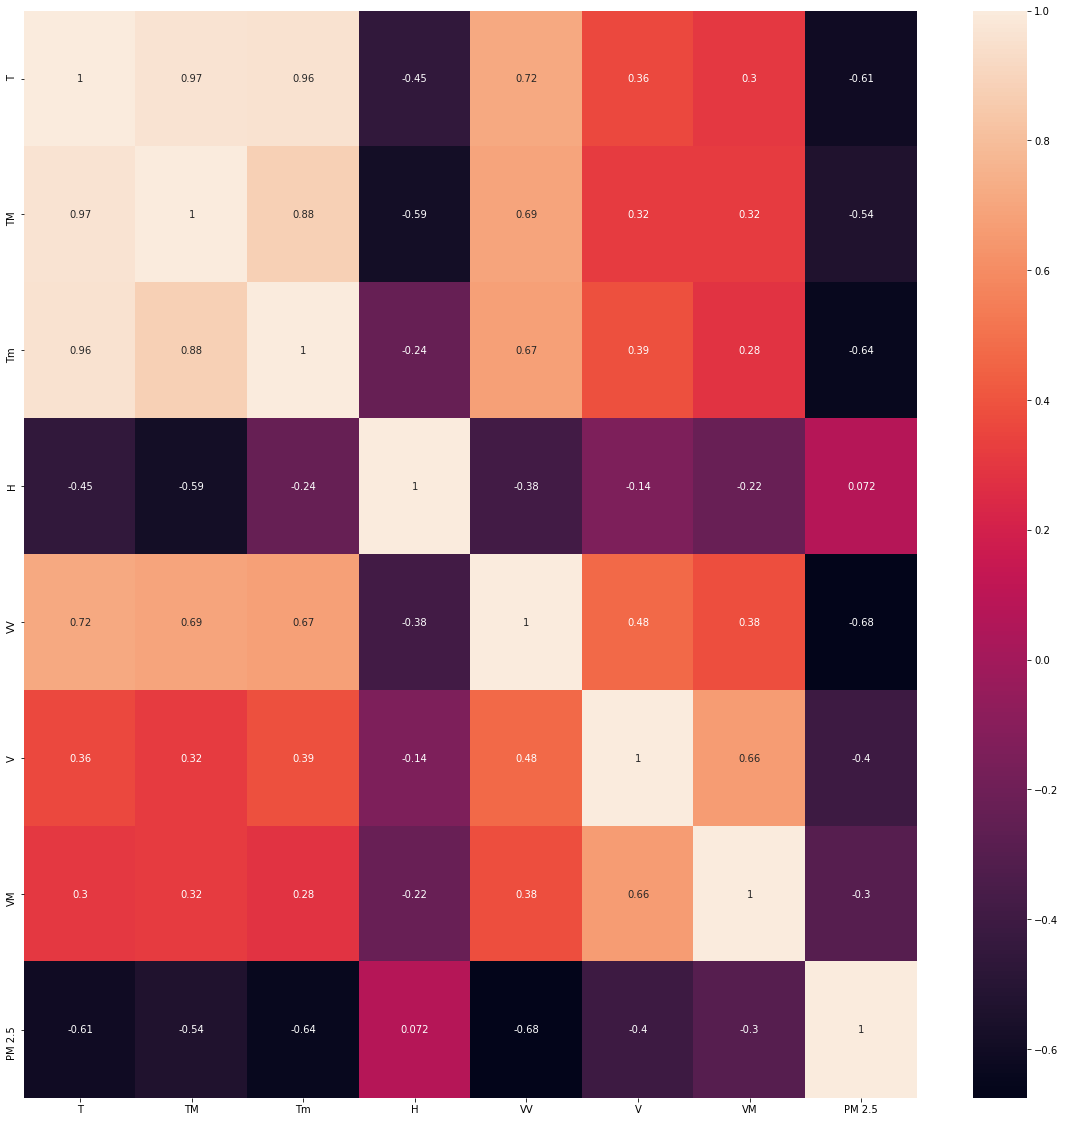

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

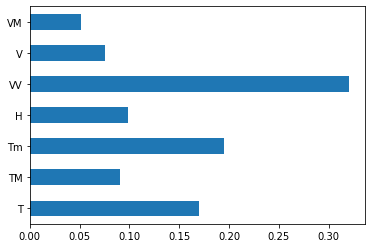

In [8]:
feat_impt = pd.Series(model.feature_importances_,index=x.columns)
feat_impt.plot(kind='barh')
plt.show()

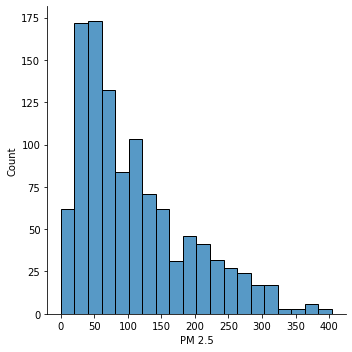

In [73]:
sns.displot(y)

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values,y.values,test_size=0.2,random_state=42)

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
# lr = LinearRegression()
lr = RandomForestRegressor(n_estimators=10,random_state=42)
# lr = DecisionTreeRegressor(criterion='mse')
# lr = Ridge(alpha=40)
# lr = Lasso(alpha=1)
# parameters = {'alpha':[1,5,10,20,1e-10,1e-15]}
# lr = GridSearchCV(lr,parameters,scoring='neg_mean_squared_error',cv=5)
# lr = KNeighborsRegressor(n_neighbors=10)
lr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [240]:
lr.score(x_train,y_train)

0.915456833271324

In [241]:
y_pred = lr.predict(x_test)

In [242]:
from sklearn.metrics import r2_score,adjusted_rand_score
r2_score(y_test,y_pred)
# adjusted_rand_score(y_test,y_pred)
# print(1-(1-r2_score(y_test, y_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1)))

0.6654550238134977

In [212]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr,x_train,y_train,cv=5)

In [213]:
cvs.mean()

0.1621591427458818

In [214]:
cvs.std()

0.09701822391563711

In [203]:
import pickle

In [204]:
file = open("regression_model.pkl",'wb')

pickle.dump(lr,file)

file.flush()

In [227]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [228]:
mse

4219.894027464965

c:\users\rockv\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

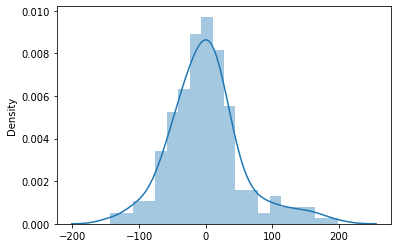

In [207]:
sns.distplot(y_test - y_pred)

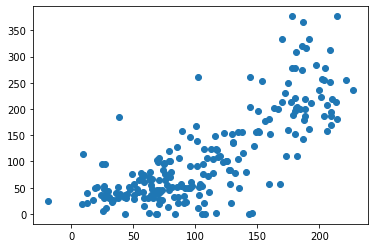

In [208]:
plt.scatter(y_pred,y_test)